In [2]:
import numpy as np
import re
import math

def getDateSet(dataPath=""r"./SMSSpamCollection"):
    with open(dataPath, encoding='utf-8') as f:
        txt_data = f.readlines()
    # 所有邮件
    data = []
    # 标签
    classTag = []
    # 垃圾邮件
    spam_data_num = 0
    # 正常邮件
    ham_data_num = 0
    for line in txt_data:
        line_split = line.strip("\n").split('\t')
        if line_split[0] == "ham":
            data.append(line_split[1])
            spam_data_num += 1
            classTag.append(1)
        elif line_split[0] == "spam":
            data.append(line_split[1])
            ham_data_num += 1
            classTag.append(0)
    print("数据集大小为{}, 其中垃圾邮件数量为{}，正常邮件数量为{}".format(len(data), spam_data_num, ham_data_num))
    return data, classTag

In [3]:
class NaiveBayes:
    def __init__(self):
        self.__ham_count = 0  # 正常短信数量
        self.__spam_count = 0  # 垃圾短信数量

        self.__ham_words_count = 0  # 正常短信单词总数
        self.__spam_words_count = 0  # 垃圾短信单词总数

        self.__ham_words = list()  # 正常短信单词列表
        self.__spam_words = list()  # 垃圾短信单词列表

        # 训练集中不重复单词集合
        self.__word_dictionary_set = set()
        self.__word_dictionary_size = 0

        self.__ham_map = dict()  # 正常短信的词频统计
        self.__spam_map = dict()  # 垃圾短信的词频统计

        self.__ham_probability = 0.0
        self.__spam_probability = 0.0

    # 输入为一封邮件的内容
    def data_preprocess(self, sentence):
        # 将输入转换为小写并将特殊字符替换为空格
        temp_info = re.sub('\W', ' ', sentence.lower())
        # 根据空格将其分割为一个一个单词
        words = re.split(r'\s+', temp_info)
        # 返回长度大于等于3的所有单词
        return list(filter(lambda x: len(x) >= 3, words))

    def fit(self, X_train, y_train):
        words_line = []
        for sentence in X_train:
            words_line.append(self.data_preprocess(sentence))
        self.build_word_set(words_line, y_train)
        self.word_count()

    def build_word_set(self, X_train, y_train):
        for words, y in zip(X_train, y_train):
            if y == 0:
                # 正常短信
                self.__ham_count += 1
                self.__ham_words_count += len(words)
                for word in words:
                    self.__ham_words.append(word)
                    self.__word_dictionary_set.add(word)
            if y == 1:
                # 垃圾短信
                self.__spam_count += 1
                self.__spam_words_count += len(words)
                for word in words:
                    self.__spam_words.append(word)
                    self.__word_dictionary_set.add(word)

        self.__word_dictionary_size = len(self.__word_dictionary_set)

    def word_count(self):
        # 不同类别下的词频统计
        for word in self.__ham_words:
            self.__ham_map[word] = self.__ham_map.setdefault(word, 0) + 1

        for word in self.__spam_words:
            self.__spam_map[word] = self.__spam_map.setdefault(word, 0) + 1

        # 非垃圾短信的概率
        self.__ham_probability = self.__ham_count / (self.__ham_count + self.__spam_count)
        # 垃圾短信的概率
        self.__spam_probability = self.__spam_count / (self.__ham_count + self.__spam_count)
        print("正常短信词频：{}".format(self.__ham_map))
        print("垃圾短信词频：{}".format(self.__spam_map))

    def predict(self, X_test):
        return [self.predict_one(sentence) for sentence in X_test]

    def predict_one(self, sentence):
        ham_pro = 0
        spam_pro = 0
        words = self.data_preprocess(sentence)
        for word in words:
            ham_pro += math.log(
                (self.__ham_map.get(word, 0) + 1) / (self.__ham_count + self.__word_dictionary_size))

            spam_pro += math.log(
                (self.__spam_map.get(word, 0) + 1) / (self.__spam_count + self.__word_dictionary_size))

        ham_pro += math.log(self.__ham_probability)
        spam_pro += math.log(self.__spam_probability)
        return int(spam_pro >= ham_pro)

In [4]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
if __name__ == "__main__":
    # 加载数据集
    data, classTag = getDateSet()
    # 设置训练集大小
    train_size = 3000
    # 训练集
    train_X = data[:train_size]
    train_y = classTag[:train_size]
    # 测试集
    test_X = data[train_size:]
    test_y = classTag[train_size:]
    # 在训练集上训练模型
    nb_model = NaiveBayes()
    nb_model.fit(train_X, train_y)
    # 在测试集上得到预测结果
    pre_y = nb_model.predict(test_X)

    # 模型评价
    accuracy_score_value = accuracy_score(test_y, pre_y)
    recall_score_value = recall_score(test_y, pre_y)
    precision_score_value = precision_score(test_y, pre_y)
    classification_report_value = classification_report(test_y, pre_y)
    print("准确率:", accuracy_score_value)
    print("召回率:", recall_score_value)
    print("精确率:", precision_score_value)
    print(classification_report_value)

数据集大小为5574, 其中垃圾邮件数量为4827，正常邮件数量为747
正常短信词频：{'free': 120, 'entry': 18, 'wkly': 9, 'comp': 6, 'win': 39, 'cup': 4, 'final': 11, 'tkts': 3, '21st': 2, 'may': 6, '2005': 3, 'text': 62, '87121': 3, 'receive': 19, 'question': 4, 'std': 5, 'txt': 102, 'rate': 15, 'apply': 14, '08452810075over18': 2, 'freemsg': 9, 'hey': 5, 'there': 8, 'darling': 2, 'been': 21, 'week': 37, 'now': 115, 'and': 81, 'word': 17, 'back': 14, 'like': 7, 'some': 3, 'fun': 3, 'you': 154, 'for': 102, 'still': 4, 'xxx': 8, 'chgs': 1, 'send': 42, 'rcv': 2, 'winner': 10, 'valued': 3, 'network': 11, 'customer': 24, 'have': 76, 'selected': 14, 'receivea': 1, '900': 3, 'prize': 50, 'reward': 2, 'claim': 62, 'call': 181, '09061701461': 1, 'code': 14, 'kl341': 1, 'valid': 13, 'hours': 2, 'only': 44, 'had': 7, 'your': 136, 'mobile': 59, 'months': 1, 'more': 19, 'entitled': 3, 'update': 10, 'the': 112, 'latest': 19, 'colour': 5, 'mobiles': 7, 'with': 55, 'camera': 16, '08002986030': 1, 'six': 1, 'chances': 1, 'cash': 46, 'from':

In [7]:
# 打开文件，指定路径和编码方式
try:
    with open('./SMSSpamCollection', 'r', encoding='utf8') as f:
        # 读取文件中的每一行，并按制表符分隔
        sms = [line.strip().split('\t') for line in f]
    
    # 将列表中的每个元素拆分为两个部分：标签(y)和内容(X)
    y, X = zip(*sms)

except FileNotFoundError:
    # 如果文件未找到，打印错误信息
    print("文件未找到，请检查路径。")
except Exception as e:
    # 捕捉其他异常并打印错误信息
    print(f"发生错误: {e}")

In [8]:
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.model_selection import train_test_split

# 将标签转换为布尔值'spam'为True，其它为False
y = [label == 'spam' for label in y]

# 将数据集拆分为训练集和测试集，默认测试集占比为25%
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 初始化CountVectorizer，并设置token_pattern只匹配长度为2或更多字母的单词
counter = CV(token_pattern='[a-zA-Z]{2,}')

# 在训练集上拟合CountVectorizer，并将文本转换为特征矩阵
X_train = counter.fit_transform(X_train)

# 使用训练好的CountVectorizer将测试集文本转换为特征矩阵
X_test = counter.transform(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB as NB

# 初始化MultinomialNB分类器
model = NB()

# 使用训练数据拟合模型
model.fit(X_train, y_train)

# 计算并打印训练集上的准确率
train_score = model.score(X_train, y_train)
print("train score:", train_score)

# 计算并打印测试集上的准确率
test_score = model.score(X_test, y_test)
print("test score:", test_score)

train score: 0.990909090909
test score: 0.986370157819


In [46]:
# 导入必要的库
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯分类器
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
X, y = make_blobs(n_samples=300, centers=7, random_state=3)

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# 初始化并训练高斯朴素贝叶斯模型
bayes = GaussianNB()
bayes.fit(X_train, y_train)

# 计算并输出训练集和测试集的准确率
train_score = bayes.score(X_train, y_train)
test_score = bayes.score(X_test, y_test)
print("train predict = {}".format(train_score))
print("test predict = {}".format(test_score))

# 绘制决策边界
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

# 创建网格以绘制决策边界
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = bayes.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)

# 绘制决策边界及数据点
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.cool, marker='.', edgecolors='k', label='train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.cool, marker='^', edgecolors='k', label='test')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('GaussianNB Decision Boundary')
plt.legend()
plt.show()

train predict = 0.8933333333333333
test predict = 0.84


train predict = 0.5422222222222223
test predict = 0.5066666666666667


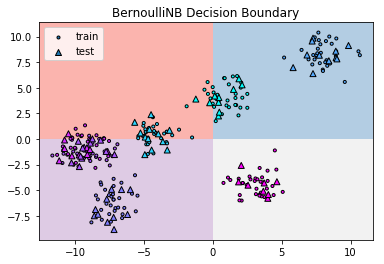

In [47]:
# 导入必要的库和模块
from sklearn.datasets import make_blobs  # 生成示例数据
from sklearn.model_selection import train_test_split  # 切分数据集
from sklearn.naive_bayes import BernoulliNB  # 伯努利朴素贝叶斯分类器
import numpy as np  # 数值计算
import matplotlib.pyplot as plt  # 绘图库

# 生成示例数据
X, y = make_blobs(n_samples=300, centers=7, random_state=3)

# 切分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# 初始化并训练伯努利朴素贝叶斯模型
bayes = BernoulliNB()
bayes.fit(X_train, y_train)

# 计算并输出训练集和测试集的准确率
train_score = bayes.score(X_train, y_train)
test_score = bayes.score(X_test, y_test)
print("train predict = {}".format(train_score))
print("test predict = {}".format(test_score))

# 绘制决策边界
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

# 创建网格以绘制决策边界
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = bayes.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 绘制决策边界及数据点
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1, alpha=0.3)  # 决策边界的颜色
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.cool, marker='.', edgecolors='k', label='train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.cool, marker='^', edgecolors='k', label='test')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('BernoulliNB Decision Boundary')
plt.legend()
plt.show()

train predict = 0.44
test predict = 0.37333333333333335


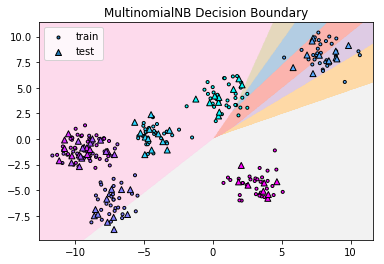

In [48]:
# 导入必要的库和模块
from sklearn.datasets import make_blobs  # 生成示例数据
from sklearn.model_selection import train_test_split  # 切分数据集
from sklearn.naive_bayes import MultinomialNB  # 多项式朴素贝叶斯分类器
import numpy as np  # 数值计算
import matplotlib.pyplot as plt  # 绘图库
from sklearn.preprocessing import MinMaxScaler  # 数据标准化

# 生成示例数据
X, y = make_blobs(n_samples=300, centers=7, random_state=3)

# 切分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# 初始化数据标准化器并应用于训练集和测试集
scaler = MinMaxScaler()
scaler.fit(X_train)  # 计算训练集的缩放参数
X_train_scaler = scaler.transform(X_train)  # 规范化训练集
X_test_scaler = scaler.transform(X_test)  # 规范化测试集

# 初始化并训练多项式朴素贝叶斯模型
bayes = MultinomialNB()
bayes.fit(X_train_scaler, y_train)

# 计算并输出训练集和测试集的准确率
train_score = bayes.score(X_train_scaler, y_train)
test_score = bayes.score(X_test_scaler, y_test)
print("train predict = {}".format(train_score))
print("test predict = {}".format(test_score))

# 绘制决策边界
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

# 创建网格以绘制决策边界
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = bayes.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 绘制决策边界及数据点
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1, alpha=0.3)  # 决策边界的颜色
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.cool, marker='.', edgecolors='k', label='train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.cool, marker='^', edgecolors='k', label='test')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('MultinomialNB Decision Boundary')
plt.legend()
plt.show()